<a href="https://colab.research.google.com/github/dyounes/cars_prediction_ML_v1.0/blob/main/Car_Price_Prediction_using_Machine_Learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The problem statement Car price prediction** 

link to data set used in this project:
https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

**Importing the dependencies**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

**Data collection and Processing**

In [14]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [15]:
#  inspecting the firs 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
#  checking the number of rows and column
car_dataset.shape


(301, 9)

In [17]:
#  getting some information about the dataset to know more about variabls
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [18]:
#  checking the number of messing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [19]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


** Enconding the Categorical Data**

In [21]:
#  always make a copy of the original dataset
car_dataset_copy = car_dataset.copy()

In [26]:
# encoding "Fuel_Type, Seller_Type, Fuel_Type" column with numericals 
car_dataset_copy.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
car_dataset_copy.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
car_dataset_copy.replace({'Transmission':{'Manual':0, 'Automatic':1, }}, inplace=True)

In [27]:
car_dataset_copy.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


**Splitting the data into Data & Target**

In [28]:
X = car_dataset_copy.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset_copy['Selling_Price']

In [31]:
print(X)
print('###########################################')
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             1   
1    2013           9.54       43000          1            0             1   
2    2017           9.85        6900          0            0             1   
3    2011           4.15        5200          0            0             1   
4    2014           6.87       42450          1            0             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             1   
297  2015           5.90       60000          0            0             1   
298  2009          11.00       87934          0            0             1   
299  2017          12.50        9000          1            0             1   
300  2016           5.90        5464          0            0             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

**Splitting the data into training dat and test Data**

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)


**Model Training 1. Linear Regression**

In [40]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [41]:
lin_reg_model.fit(x_train, y_train)


LinearRegression()

**Model Evaluation**

In [42]:
#  prediction on Training data
training_data_prediction = lin_reg_model.predict(x_train)

In [44]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print( "R squared Error is", error_score)

R squared Error is 0.8719637171352994


**visualize the actual prices and predicted prices**

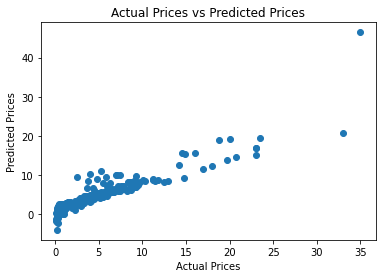

In [59]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [47]:
#  prediction on Test data
test_data_prediction = lin_reg_model.predict(x_test)

In [48]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print( "R squared Error is", error_score)

R squared Error is 0.8340585167699703


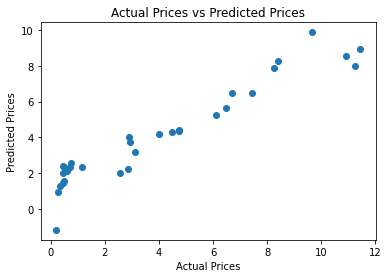

In [60]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

 **Training the Lasso regression model** 

In [50]:
# loading the linear regression model
lasso_model = Lasso()

In [51]:
lasso_model.fit(x_train, y_train)


Lasso()

**Model Evaluation**

In [52]:
#  prediction on Training data
training_data_prediction = lasso_model.predict(x_train)

In [53]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print( "R squared Error is", error_score)

R squared Error is 0.8427856123435794


**visualize the actual prices and predicted prices**

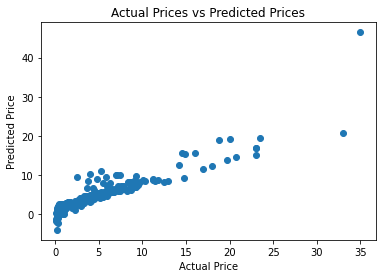

In [54]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [55]:
#  prediction on Test data
test_data_prediction = lasso_model.predict(x_test)

In [56]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print( "R squared Error is", error_score)

R squared Error is 0.8709167941173195


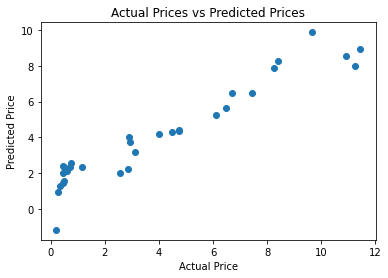

In [57]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

**on conclusion Lasso model is more close in price prediction**

In [70]:
predicted_Prices = pd.DataFrame(test_data_prediction, columns=['Predicted Price'])
print(' The predicted Prices for the used cares using ML Lasso model is:\n')
print(predicted_Prices)

 The predicted Prices for the used cares using ML Lasso model is:

    Predicted Price
0          9.878881
1          1.423963
2          4.332678
3          3.173134
4          8.955906
5          4.293974
6          3.739136
7          5.662840
8          0.914784
9          5.255143
10         6.472388
11         4.395073
12         1.295516
13         8.265600
14         2.002923
15         2.325292
16         2.553497
17         2.347422
18         7.968952
19         4.184412
20         2.336992
21         7.865985
22         2.023082
23         8.567348
24         1.554981
25         6.485611
26         2.114275
27        -1.184220
28         4.017104
29         2.217497
30         2.418209
